In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

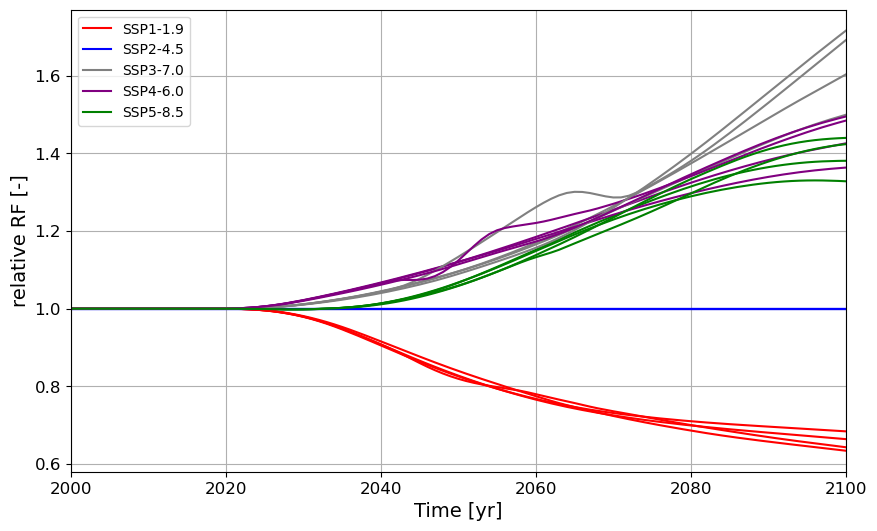

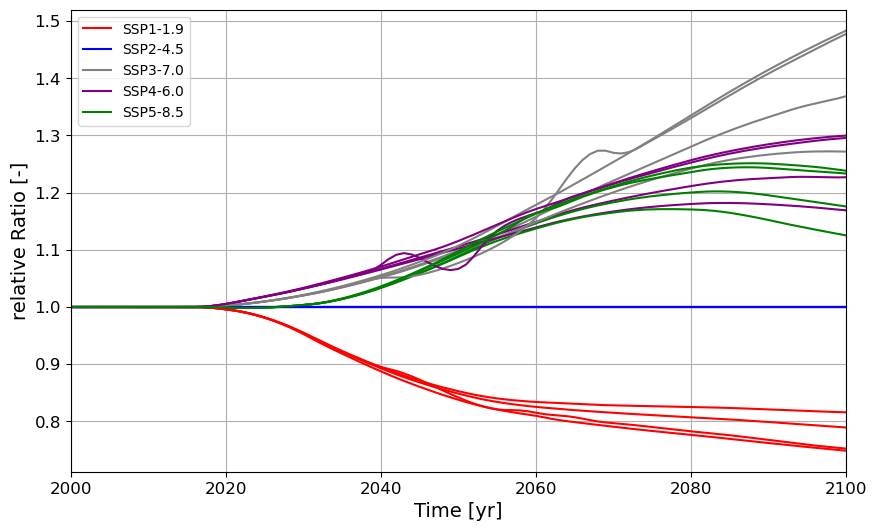

In [2]:
scenarios = ["GBAU", "GCurTec", "GFP2050", "GFP2050cont"]
ssps = ["_SSP1-1_9",
        "_SSP2-4_5",
        "_SSP3-7_0",
        "_SSP4-6_0",
        "_SSP5-8_5",
    ]
scenario_color = {
        "_SSP1-1_9": "r",
        "_SSP2-4_5": "b",
        "_SSP3-7_0": "grey",
        "_SSP4-6_0": "purple",
        "_SSP5-8_5": "green",
    }
for ref in ssps:
    if ref != "_SSP2-4_5":
        continue
    for scenario in scenarios:
        # ref = '_SSP2-4_5'
        reference_ds = xr.open_dataset(f"results_{scenario+ref}/{scenario+ref}.nc")
        
        for ssp in ssps:
            label = ssp.lstrip("_").replace("_", ".", 1)
            case = scenario + ssp
            ds_p = f"results_{case}/{case}.nc"
            ds = xr.open_dataset(ds_p)
            #RF_SWV
            relative_data = ds['RF_SWV'][0]/reference_ds['RF_SWV'][0]
            plt.figure('swv',figsize=(10,6))
            relative_data.plot(x="time", label=label, color=scenario_color[ssp])
            plt.grid()
            plt.xlim([2000,2100])
            # plt.title(f"reference = {ref}")
            plt.ylabel(r'relative RF [-]', fontsize=14)
            plt.xlabel("Time [yr]", fontsize=14)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.grid(True)
            
            handles, labels = plt.gca().get_legend_handles_labels()
        
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys(), loc='upper left')
            plt.title('')
        
            plt.savefig(f"relative_ssp_dependency_swv.png")
            # Ratio
            relative_data = (ds['RF_SWV'][0]/ds['RF_CH4'][0])/(reference_ds['RF_SWV'][0]/reference_ds['RF_CH4'][0])
            plt.figure('ratio',figsize=(10,6))
            relative_data.plot(x="time", label=label, color=scenario_color[ssp])
            plt.grid()
            plt.xlim([2000,2100])
            # plt.title(f"reference = {ref}")
            plt.ylabel(r'relative Ratio [-]', fontsize=14)
            plt.xlabel("Time [yr]", fontsize=14)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.grid(True)
            
            handles, labels = plt.gca().get_legend_handles_labels()
        
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys(), loc='upper left')
            plt.title('')
        
            plt.savefig(f"relative_ssp_dependency_ratio.png")
            # plt.legend(loc='upper left')
    

    plt.show()



In [5]:
qq = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\Scenario_Analysis\bg_co2_c17.nc")
qq

<xarray.Dataset> Size: 2kB
Dimensions:        (year: 31)
Coordinates:
  * year           (year) int64 248B 1850 1950 2000 2010 ... 2220 2230 2240 2250
Data variables:
    SSP1-1.9       (year) float64 248B 284.3 312.8 369.1 ... 343.6 343.5 343.3
    SSP2-4.5       (year) float64 248B 284.3 312.8 369.1 ... 642.1 640.0 637.0
    SSP3-7.0       (year) float64 248B 284.3 312.8 369.1 ... 1.516e+03 1.514e+03
    SSP4-6.0       (year) float64 248B 284.3 312.8 369.1 ... 790.2 789.0 786.2
    SSP5-8.5       (year) float64 248B 284.3 312.8 369.1 ... 2.209e+03 2.206e+03
    constant_2017  (year) float64 248B 399.9 399.9 399.9 ... 399.9 399.9 399.9
Attributes:
    Title:      CO2 background scenarios
    long_name:  CO2 concentration
    units:      ppm
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020

# The test for differences between scenarios

1. run BAU and CurTec for the sensitivity range of MC simulation
2. get 2 distributions for the 2100 value
3. do test if the distributions are normal
4. do test if the distributions are significantly different
5.  probably not
6. Do tests on the distribution of the difference
7. test if the distribution difference is significantly different from 0, (this due to correlation of the parameters
8. conclude that the scenarios are significantly different




In [ ]:
# Run
